# Logistic Regression Mode.

 ### Problem Statement: Determine wether particular internet user clicked on advertise or not.

#  <font color= green> Step1: Probelm Formulation.</font>
***

 ### What is need to be solve?
 
 * we want to find out whether or not a particular internet user clicked on an Advertisement. 
 
 
 ### What you are going to do?
 * We will try to create a logistic regresssion model that will predict whether or not they will click on an ad based off the features of that user.

# <font color=green > Step2: Gather the Raw-Data & understand features clearly.</font>
***

## 1. Import required libraries.

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [84]:
dataset = pd.read_csv('advertising.csv')

In [85]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [86]:
dataset.keys()

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

 ###  Features information
 
#### Independent Variables:
 ***
 1. Daily Time Spent on Site.: consumer time on site in minutes
 2. Age.: cutomer age in years
 3. Area Income.: AVG .Area income (COUNTRYWISE) in INR
 4. Daily Internet Usage: Avg. minutes a day consumer is on the internet
 5. Ad Topic Line: Headline of the advertisement
 6. City: City of consumer
 7. Male: Consumer male or not?
 8. Country: Country of consumer
 9. Timestamp: Time at which consumer clicked on Ad or closed window.

#### Dependet Variable:
 ***
 10. Clicked on Ad: 0 or 1 indicated clicking on Ad

# <font color=green > Step 3: Data preprocessing</font>

 ### 1. Checking for null values / shape / info. 
 ***

In [87]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [88]:
# removing spaces in column names...since it will get easier during model deployment..
dataset.columns = dataset.columns.str.replace(' ', '_') 

In [89]:
dataset.keys()

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

In [90]:
# checking datatype in each column.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area_Income               1000 non-null   float64
 3   Daily_Internet_Usage      1000 non-null   float64
 4   Ad_Topic_Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [91]:
# Numerical coumn insights.

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily_Time_Spent_on_Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area_Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily_Internet_Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked_on_Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [92]:
# checking for null values..

dataset.isna().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area_Income                 0
Daily_Internet_Usage        0
Ad_Topic_Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked_on_Ad               0
dtype: int64

In [93]:
# cross checking for null values..Making a list of missing value types

missing_values = ["n/a", "na", "--"," "]
df = pd.read_csv("advertising.csv", na_values = missing_values)

In [94]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [95]:
dataset.shape

(1000, 10)

 ### 2. Exploratory Data Analysis.
 ***

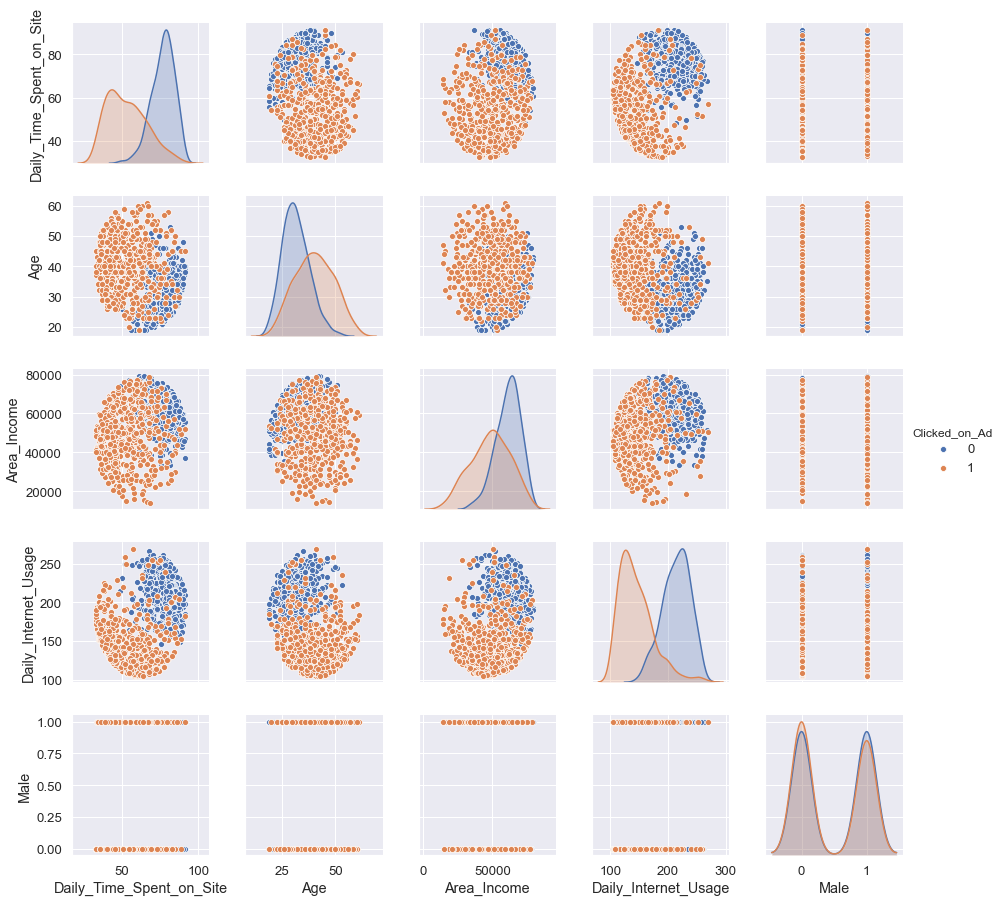

In [96]:
# seaborn pairplot

sns.pairplot(data = dataset, hue = 'Clicked_on_Ad')
plt.show()

<Figure size 432x288 with 0 Axes>

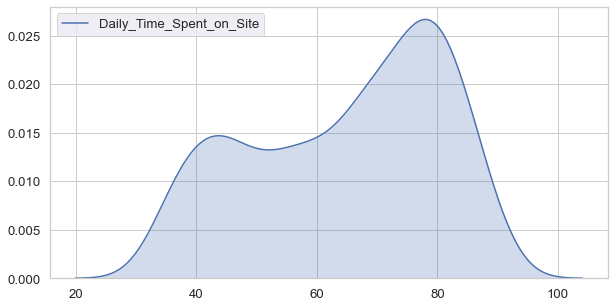

<Figure size 432x288 with 0 Axes>

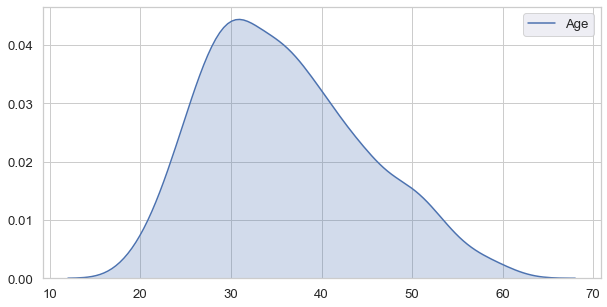

<Figure size 432x288 with 0 Axes>

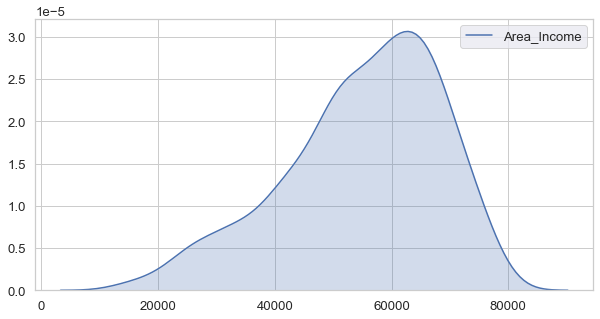

<Figure size 432x288 with 0 Axes>

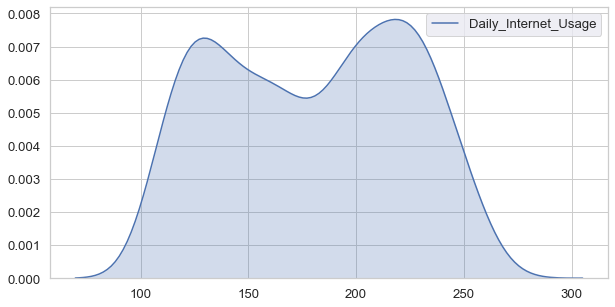

<Figure size 432x288 with 0 Axes>

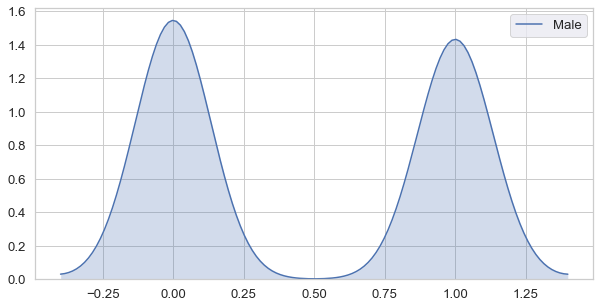

<Figure size 432x288 with 0 Axes>

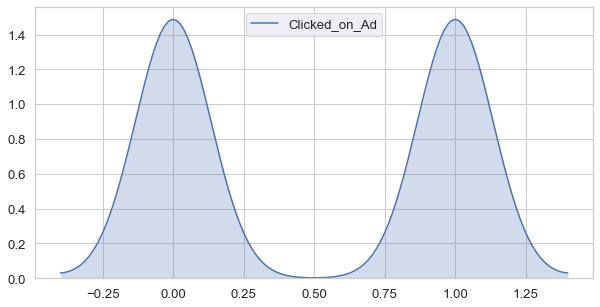

In [97]:
# Checking columnswise data visualization.
# taking non object datatype column..

df1 = dataset.select_dtypes(exclude=[np.object])
for i, col in enumerate(df1.columns):
    sns.set_style('whitegrid')
    plt.figure(i)
    fig, ax =plt.subplots(figsize=(10,5))
    sns.set(font_scale = 1.2)
    sns.kdeplot(df1[col], shade=True)
    plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


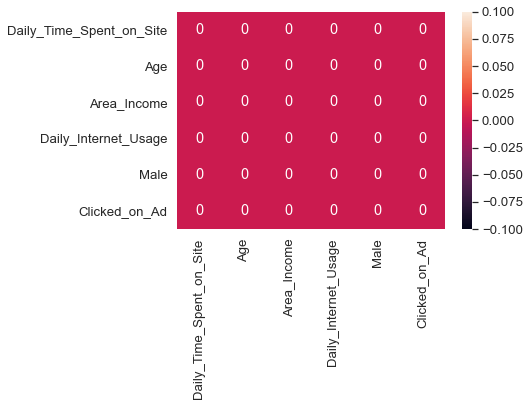

In [98]:
# correlation matrix.

print(sns.heatmap(dataset.corr()<-0.8, annot=True))

AxesSubplot(0.125,0.125;0.62x0.755)


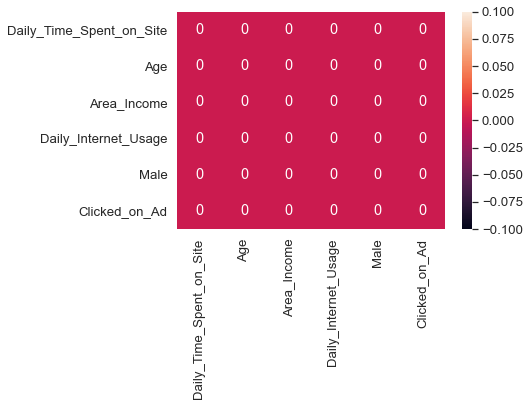

In [99]:
print(sns.heatmap(dataset.corr()<-0.8, annot=True))

both correlation heatmap shows there is no multicollinearity in numerical datatype indepedendent variables.

 ### 2. Categorical data handling.

In [100]:
# Checking for total no. of unique values in object datatypes..

df2 = dataset.select_dtypes(include=[np.object])
for i in df2.columns:
    unique_value = df2[i].nunique()
    print("total unique values in '{}' : {}".format(i, unique_value))

total unique values in 'Ad_Topic_Line' : 1000
total unique values in 'City' : 969
total unique values in 'Country' : 237
total unique values in 'Timestamp' : 1000


Since there are mno. of categorical fvalues..so generating insights for logistic regression by considering huge no. of categorical features will not helpful.

In [101]:
 # We will drop two columns from main dataset..1) Ad Topic Line & 2) Timestamp. Since this information is not helpful.
    
dataset1 = dataset.drop(['Ad_Topic_Line','Timestamp'], axis=1)

In [102]:
dataset1.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,City,Male,Country,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0


In [103]:
# Converting categorical datatyps...

dataset1["Country"] = dataset1.Country.astype('category').cat.codes
dataset1["City"] = dataset1.City.astype('category').cat.codes

In [104]:
dataset1.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,City,Male,Country,Clicked_on_Ad
0,68.95,35,61833.90,256.09,961,0,215,0
1,80.23,31,68441.85,193.77,903,1,147,0
2,69.47,26,59785.94,236.50,111,0,184,0
3,74.15,29,54806.18,245.89,939,1,103,0
4,68.37,35,73889.99,225.58,805,0,96,0


 ### 3. Separating depedent & independent variables..

In [105]:
x = dataset1.drop(['Clicked_on_Ad'], axis=1)

In [106]:
y = dataset1.loc[:,['Clicked_on_Ad']]

In [107]:
x.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,City,Male,Country
0,68.95,35,61833.90,256.09,961,0,215
1,80.23,31,68441.85,193.77,903,1,147
2,69.47,26,59785.94,236.50,111,0,184
3,74.15,29,54806.18,245.89,939,1,103
4,68.37,35,73889.99,225.58,805,0,96


In [108]:
y.head()

,Clicked_on_Ad
0,0
1,0
2,0
3,0
4,0


 ### 4.  Feature Selection

 note: correlation matrix also one of the technique to selct features.

In [109]:
# We will use recursive feature elimination technique(RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
rfe = RFE(log_reg,7)
rfe_fit = rfe.fit(x,y)

In [110]:
rfe_fit.ranking_

array([1, 1, 1, 1, 1, 1, 1])

In [111]:
len(rfe_fit.ranking_)  # which equals to no. of columns in x dataset

7

that is, it shows all columns are importatnt features..

# <font color=green > Step 4: Split the raw data</font>

Since we are executing supervised machine learning algorithm we must split our dataset.

 ### 1. Splitting dataset into train, test, valid sets.

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state =15)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size = 0.1, random_state = 15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print()
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(720, 7)
(200, 7)
(80, 7)

(720, 1)
(200, 1)
(80, 1)


 ### 2. checking all splitted data is balnced or imbalanced

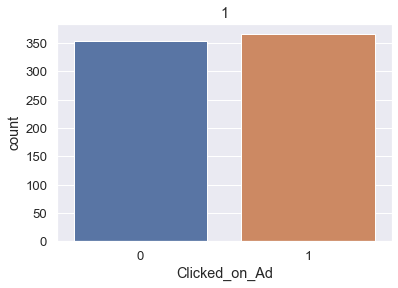

----------------------------------------------------------------------------------------------------


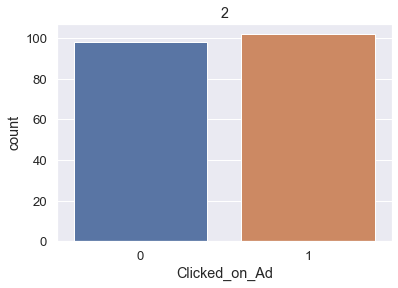

----------------------------------------------------------------------------------------------------


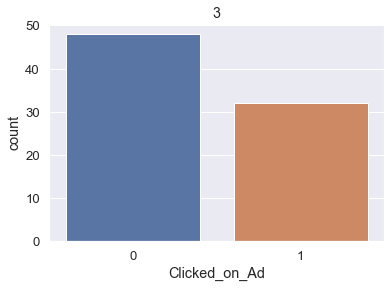

----------------------------------------------------------------------------------------------------


In [113]:
list1 = [y_train, y_test, y_valid]
m=1
for i in list1:
    plt.title(m)
    sns.countplot(x='Clicked_on_Ad', data = i)
    plt.show()
    print("--"*50)
    m +=1

# <font color=green > Step 5: Select & train the model</font>

 ### 1 . Grid Search for Hyperparameter Tuning

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga']},{'random_state':[10]},
              {'C':[[i for i in np.geomspace(1e-3, 1e1, num=20)]]}]

In [115]:
# using GridSearchCV

from sklearn.model_selection import GridSearchCV

# help(GridSearchCV)
grid_search = GridSearchCV(estimator= model, param_grid= parameters, scoring='accuracy', n_jobs= -1)

grid_search = grid_search.fit(x_train, y_train)

In [116]:
accuracy = grid_search.best_score_
accuracy

0.9638888888888889

In [117]:
estimator = grid_search.best_estimator_
estimator

LogisticRegression(solver='newton-cg')

In [118]:
grid_search.best_params_

{'solver': 'newton-cg'}

So  GridSearchCV has given solver: newton-cg

 ### 2. Implementing Logistic regressiion Model

In [119]:
from sklearn.linear_model import LogisticRegression

# creating instance.. 
model1 = LogisticRegression(penalty='l2', solver = 'newton-cg', random_state=10)

# fitting model..
model1.fit(x_train, y_train)

# predicting results for y variable using dependent variable set x_train
y_pred = model1.predict(x_train)

In [120]:
# Generating predict values in probabilites % format..
# first value is correspondance to '0' & second value is with '1'

predict_proba1 = model1.predict_proba(x_train).round(2)
predict_proba1

array([[0.99, 0.01],
       [0.49, 0.51],
       [0.98, 0.02],
       ...,
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.98, 0.02]])

In [121]:
# getting beta coefficients or beta weights.

model1.coef_

array([[-1.60431997e-01,  1.40996891e-01, -1.09892364e-04,
        -5.38842613e-02, -8.70151651e-04, -2.64992204e-01,
        -5.63467652e-04]])

# <font color=green > Step 6: Model Evaluation </font>

 ### Accuracy

In [122]:
# Accuracy on Train

print("The Training Accuracy is: ", model1.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", model1.score(x_test, y_test))

The Training Accuracy is:  0.9666666666666667
The Testing Accuracy is:  0.985


 ### Classifiaction report

In [123]:
# classification report..

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       354
           1       0.98      0.95      0.97       366

    accuracy                           0.97       720
   macro avg       0.97      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720



 ### Confusion Matrix.

In [124]:
# confusion matrix..

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm

array([[347,   7],
       [ 17, 349]], dtype=int64)

In [125]:
# writing function to plot confusion matrix:

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

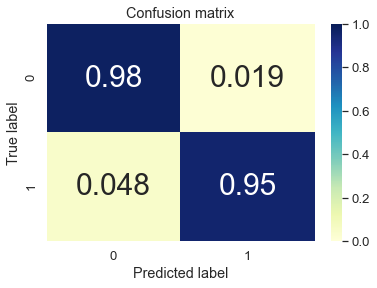

In [126]:
# plotting confusion-matrix % value

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1)

plot_confusion_matrix(cm_norm, classes = model1.classes_, title='Confusion matrix')

 ### Performance Measurement
 
     it includes..precsion, recall, confusion matrix, f1 score, PR Curve, ROC curve etc. Except curve you will get all in classification report or ou may check theorotical formulaes for more.

### I) Precison vs Recall curve.
 


 #### Useful when data is imbalanced in nature.
 #### Use PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives
 
 Increasing in precision reduces recall and vice versa.
 
 Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.
***

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
***

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.
***

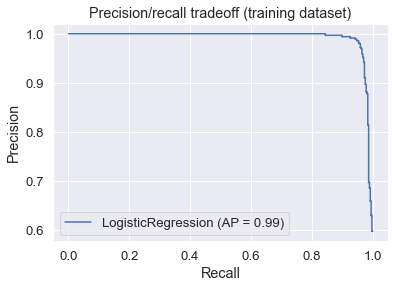

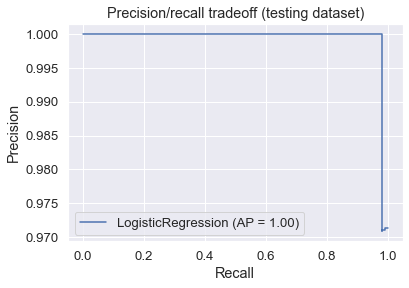

In [127]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# for training datasets.. since we used x_train to find y_pred.
disp = plot_precision_recall_curve(model1, x_train, y_train)
disp.ax_.set_title('Precision/recall tradeoff (training dataset)')
plt.show()

# for testing datasets.. since we used x_train to find y_pred.
disp = plot_precision_recall_curve(model1, x_test, y_test)
disp.ax_.set_title('Precision/recall tradeoff (testing dataset)')
plt.show()

### II) Receiver Operating Characteristic (ROC) Curve.

 #### Use ROC curve whenever the negative class is rare or when you care more about the false negatives than the false positives

Instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The false positive rate (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.


The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 - specificity.

In [128]:
# easy way to plot

# from sklearn.metrics import plot_roc_curve
# disp1 = plot_roc_curve(model1, x_train, y_train)
# plt.show()

In [129]:
# writing function to reuse..key 
def roc(y_model,y_predicted):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, thresholds = roc_curve(y_model,y_predicted)
    auc = roc_auc_score(y_model,y_predicted)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label='Logistic Regression(area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(label= 'Roc Curve')

roc curve with training dataset


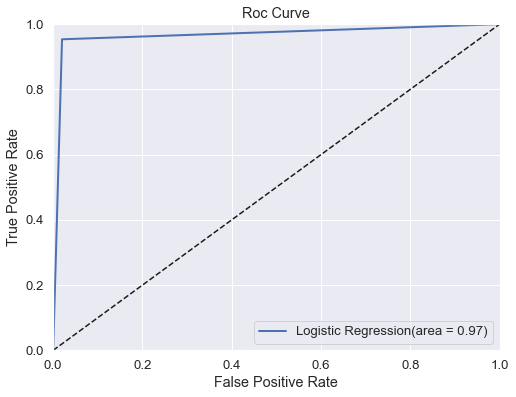

In [130]:
print('roc curve with training dataset')
roc(y_train, y_pred)

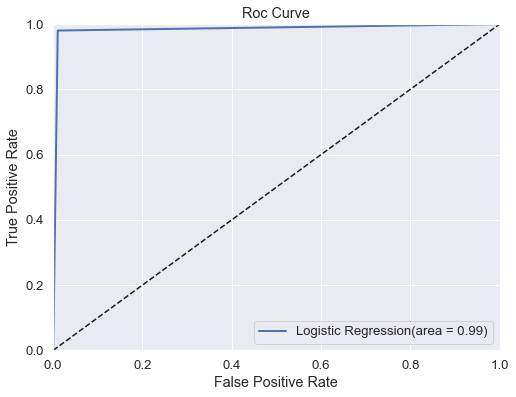

In [131]:
y_predict_t = model1.predict(x_test)
roc(y_test, y_predict_t)

 ### Log-loss

In [132]:
from sklearn.metrics import log_loss

# Running Log loss on training
# predict_proba1 = model1.predict_proba(x_train)  # we have already done this step no.5
print("The Log Loss on Training is: ", log_loss(y_train, predict_proba1))

# Running Log loss on testing set
pred_proba_t = model1.predict_proba(x_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.10795425010826831
The Log Loss on Testing Dataset is:  0.046974514031483866


# <font color=green > Step 7: Parameter Tuning </font>

* We will loop over parameter C (Inverse of regularization strength).
* We will loop over parameter C (Inverse of regularization strength).
* Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
* It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
* The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e2

Note: GirdSerchCV also be used as hypertuning parameter. But here we are going to find best value for 'C'

In [133]:
# we will find out best c value which will give min. log loss & better accuracy..

C_list = np.geomspace(1e-5, 1e2, num=20) #  log space

from sklearn.linear_model import LogisticRegressionCV 
model2 = LogisticRegressionCV(random_state=10, solver='newton-cg', Cs= C_list)
model2.fit(x_train, y_train)

print("The accuaracy is:", model2.score(x_test, y_test))
pred_proba_t = model2.predict_proba(x_test)
log_loss2 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss2)

print("The optimal C parameter is: ", model2.C_)

The accuaracy is: 0.98
The Logistic Loss is:  0.052718966449313974
The optimal C parameter is:  [0.00162378]


 ### Dummy Classifiers: Estimator score method: quantifying the quality of predictions 
 
 this is only for checking how our model deviates with dummy classifiers that overfit or underfit.
 before making final model always prefer to test on dummy classifiers.
 
 the reason behind using dummy classifier , just compare model accuracy and dummy classifier accuracy. If model accuracy is   much greater than dummy classifier then our model said to be good.
 
### click here fore more info:
https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators

In [134]:
from sklearn.dummy import DummyClassifier

# class sklearn.dummy.DummyClassifier(*, strategy='warn', random_state=None, constant=None) ...fyi only

strategies = ['stratified','most_frequent','prior', 'uniform', 'constant']
test_score = []

for s in strategies:
    if s == 'constant':
        dummy_clf = DummyClassifier(strategy=s, random_state=15, constant = 'break')
    else:
        dummy_clf = DummyClassifier(strategy=s, random_state=15)
        dummy_clf.fit(x_train, y_train)
        score = dummy_clf.score(x_test, y_test)
        test_score.append(score)

        pred_proba_t = dummy_clf.predict_proba(x_test)
        log_loss2 = log_loss(y_test, pred_proba_t)
        
        print("when strategy is '{}'".format(s))
        print("the Testing Acc:", score)
        print("the Log Loss:", log_loss2)
        print('-'*30)

when strategy is 'stratified'
the Testing Acc: 0.465
the Log Loss: 18.478245371277218
------------------------------
when strategy is 'most_frequent'
the Testing Acc: 0.51
the Log Loss: 16.924000433506237
------------------------------
when strategy is 'prior'
the Testing Acc: 0.51
the Log Loss: 0.6929527245398546
------------------------------
when strategy is 'uniform'
the Testing Acc: 0.42
the Log Loss: 0.6931471805599452
------------------------------


 #### Note: if dummy classifier accuracy is < model accuracy. Then our model is on right track

We see that the accuracy was almost 100%. A cross validation strategy is recommended for a better estimate of the accuracy, if it is not too CPU costly. For more information see the Cross-validation: evaluating estimator performance section. Moreover if you want to optimize over the parameter space, it is highly recommended to use an appropriate methodology; see the Tuning the hyper-parameters of an estimator section for details.

More generally, when the accuracy of a classifier is too close to random, it probably means that something went wrong: features are not helpful, a hyperparameter is not correctly tuned, the classifier is suffering from class imbalance, etc…

In [135]:
dummy_score = pd.DataFrame(list(zip(strategies, test_score)), columns =['strategies', 'test_score'])

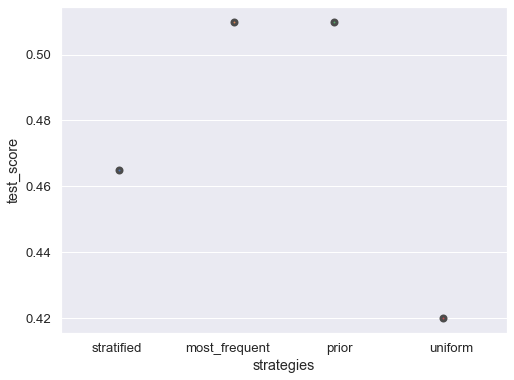

In [136]:
plt.figure(figsize=(8,6))
ax = sns.stripplot(x="strategies", y="test_score", linewidth=3,data=dummy_score)

plot shows dummy classifier accuracy with diff strategies. which much lesser than our logistic regression model accuracy (0.98). Hence we have correctly hypertuned parameters.

# <font color=green > Step 8: Fianl Model</font>

 #### We have found out solver, C value. We can use them and build our final model. 

In [137]:
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(penalty='l2', solver = 'newton-cg', random_state=10, C=0.00162378)
final_model.fit(x_train, y_train)
final_predict = final_model.predict(x_valid)

score = final_model.score(x_valid, y_valid)

pred_proba_t3 = final_model.predict_proba(x_valid)
log_loss3 = log_loss(y_valid, pred_proba_t3)

print("Testing Acc:", score)
print("Log Loss:", log_loss3)

Testing Acc: 0.975
Log Loss: 0.0765877065730024


In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, final_predict)

array([[47,  1],
       [ 1, 31]], dtype=int64)

# <font color=green > Step 9: Model Deployment</font>

* We will make separate python file for deployment code.
* From this jupyter notebook, will pickle model3 & use it in deployment file.

In [139]:
import pickle

predict = final_predict
pickle.dump(predict, open('predict.p','wb'))

In [140]:
def inputs(Daily_Time_Spent_on_Site, Age, Area_Income,Daily_Internet_Usage, City, Male, Country):
    
    new_data=pd.DataFrame({'Daily_Time_Spent_on_Site':Daily_Time_Spent_on_Site,"Age":Age,"Area_Income":Area_Income, "Daily_Internet_Usage":Daily_Internet_Usage,
                           "City":City, "Male":Male, "Country":Country},index=[1])
    
    new_data[[" Daily_Time_Spent_on_Site","Area_Income","Daily_Internet_Usage"]] = df[[" Daily_Time_Spent_on_Site","Area_Income","Daily_Internet_Usage"]].astype('float')
    
    new_data[["Age","City","Male","Country"]] = df[["Age","City","Male","Country"]].astype('int')
    final_predict = final_model.predict(new_data)
    return(final_predict).values

*****